In [1]:
pip install path

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Initial imports.
import pandas as pd
import numpy as np
import matplotlib

from path import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc #access to img read method

%matplotlib inline 
#cell magic

## importing Dataset
- Import data
- EDA to visualize data and structure
- Train a classifier (DT)
- predict target using the trained classifier

In [5]:
data = pd.read_csv('Resources/track_analytics_full.csv')

In [6]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.696627,0.645409,5.383663,-6.114266,0.573432,0.123672,0.230912,0.006635,0.172708,0.511855,121.722182,203088.907591,3.975248
std,0.138945,0.153687,3.650797,2.291785,0.494782,0.110630,0.231870,0.046332,0.134128,0.222714,29.864847,46245.684556,0.252579
min,0.238000,0.111000,0.000000,-18.435000,0.000000,0.023200,0.000025,0.000000,0.021500,0.037000,62.948000,30583.000000,1.000000
25%,0.611000,0.541000,2.000000,-7.226250,0.000000,0.046575,0.047575,0.000000,0.093600,0.339000,96.470250,174396.250000,4.000000
50%,0.714000,0.664000,6.000000,-5.754500,1.000000,0.077000,0.152000,0.000000,0.119000,0.513500,119.942000,199604.000000,4.000000
75%,0.799250,0.762000,8.000000,-4.611250,1.000000,0.162500,0.336000,0.000026,0.195000,0.681250,141.228750,226119.250000,4.000000
max,0.970000,0.972000,11.000000,-0.515000,1.000000,0.856000,0.991000,0.657000,0.920000,0.972000,203.927000,588139.000000,5.000000


In [7]:
train, test = train_test_split(data, test_size = 0.15)

In [8]:
print("Tarining size: {}; Test size: {}".format(len(train), len(test)))

Tarining size: 1030; Test size: 182


In [9]:
#shows your rows and column
train.shape

(1030, 18)

In [10]:
#color palette
red_blue =["#195B5E", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)

In [11]:
#positive and negative variable for song's attirbutes
pos_danceability = data[data['mode'] == 1]['danceability']
neg_danceability = data[data['mode'] == 0]['danceability']
pos_energy = data[data['mode'] == 1]['energy']
neg_energy = data[data['mode'] == 0]['energy']
pos_loudness = data[data['mode'] == 1]['loudness']
neg_loudness = data[data['mode'] == 0]['loudness']
pos_tempo = data[data['mode'] == 1]['tempo']
neg_tempo = data[data['mode'] == 0]['tempo']
pos_key = data[data['mode'] == 1]['key']
neg_key = data[data['mode'] == 0]['key']
pos_acousticness = data[data['mode'] == 1]['acousticness']
neg_acousticness = data[data['mode'] == 0]['acousticness']
pos_instrumentalness = data[data['mode'] == 1]['instrumentalness']
neg_instrumentalness = data[data['mode'] == 0]['instrumentalness']
pos_valence = data[data['mode'] == 1]['valence']
neg_valence = data[data['mode'] == 0]['valence']
pos_duration_ms = data[data['mode'] == 1]['duration_ms']
neg_duration_ms = data[data['mode'] == 0]['duration_ms']

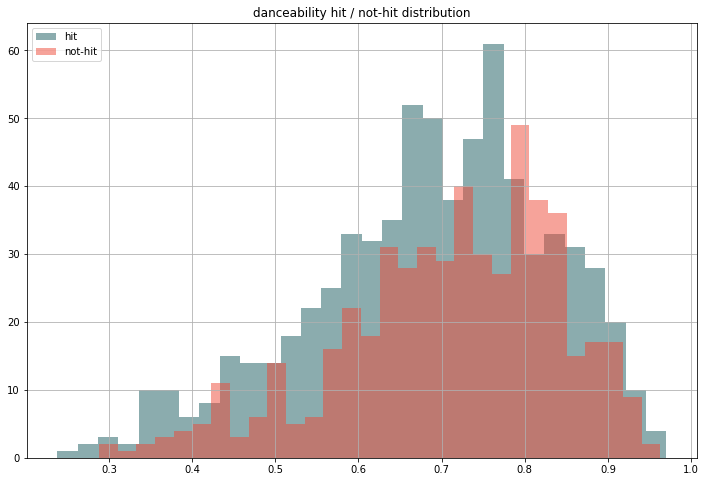

In [12]:
fig = plt.figure(figsize = (12,8))
plt.title("danceability hit / not-hit distribution")
pos_danceability.hist(alpha = 0.5, bins = 30, label='hit')
neg_danceability.hist(alpha = 0.5, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

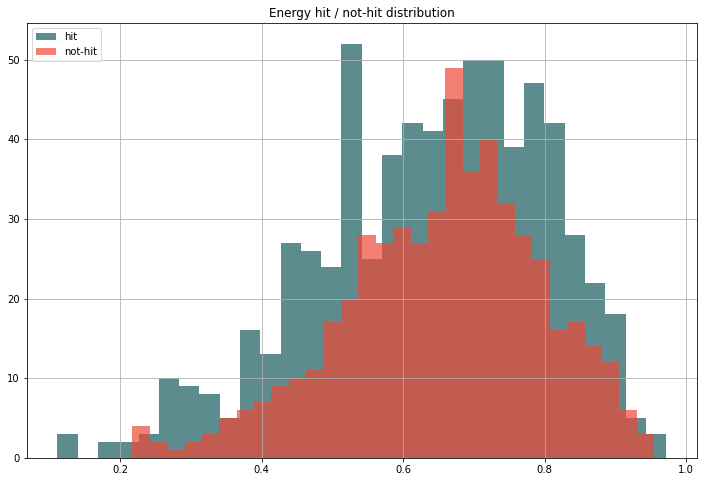

In [13]:
#energy

fig = plt.figure(figsize = (12,8))
plt.title("Energy hit / not-hit distribution")
pos_energy.hist(alpha = 0.7, bins = 30, label='hit')
neg_energy.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

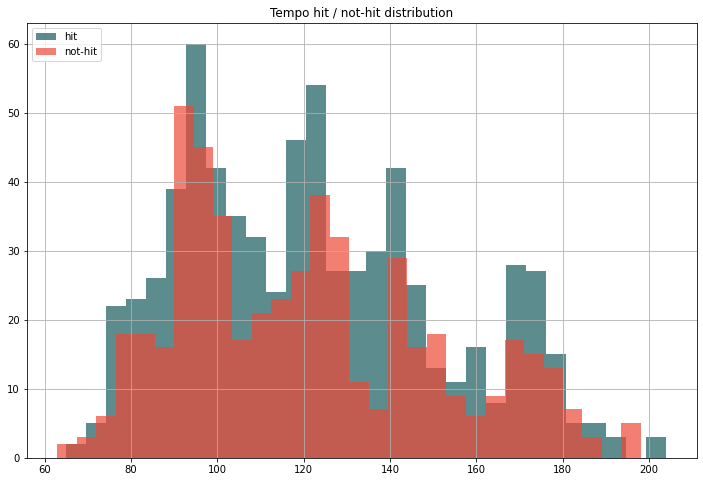

In [14]:
#tempo
fig = plt.figure(figsize = (12,8))
plt.title("Tempo hit / not-hit distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='hit')
neg_tempo.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

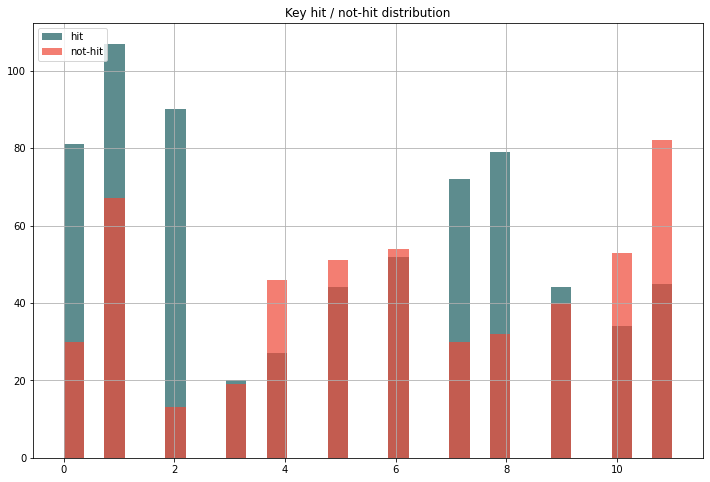

In [15]:
#key
fig = plt.figure(figsize = (12,8))
plt.title("Key hit / not-hit distribution")
pos_key.hist(alpha = 0.7, bins = 30, label='hit')
neg_key.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

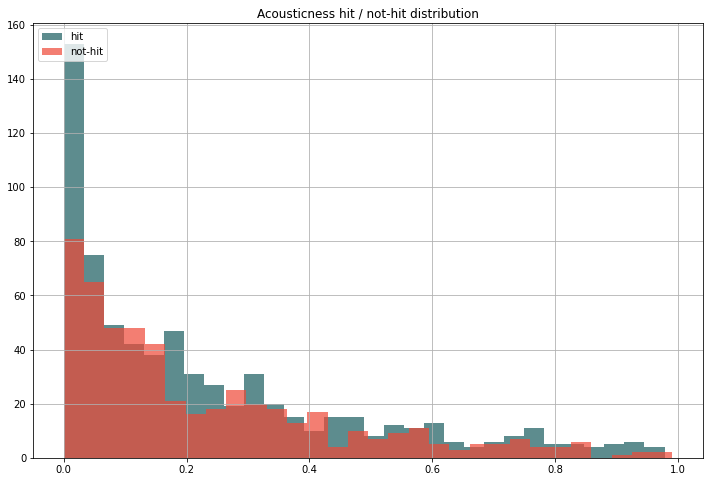

In [16]:
#acousticness
fig = plt.figure(figsize = (12,8))
plt.title("Acousticness hit / not-hit distribution")
pos_acousticness.hist(alpha = 0.7, bins = 30, label='hit')
neg_acousticness.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

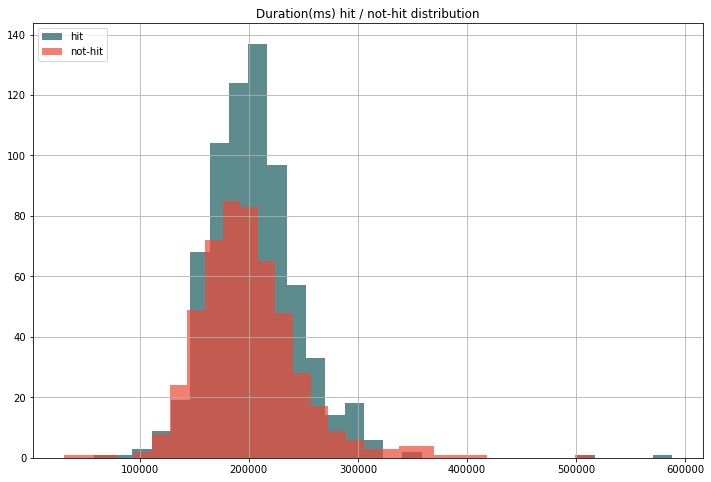

In [17]:
#duration_ms
fig = plt.figure(figsize = (12,8))
plt.title("Duration(ms) hit / not-hit distribution")
pos_duration_ms.hist(alpha = 0.7, bins = 30, label='hit')
neg_duration_ms.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

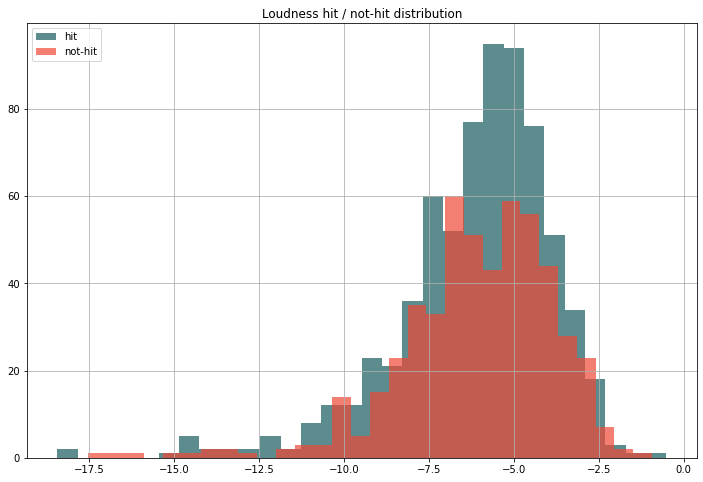

In [18]:
#loudness
fig = plt.figure(figsize = (12,8))
plt.title("Loudness hit / not-hit distribution")
pos_loudness.hist(alpha = 0.7, bins = 30, label='hit')
neg_loudness.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

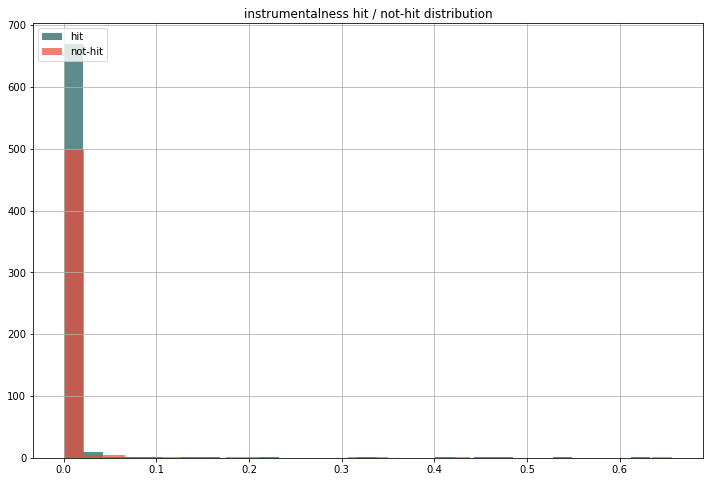

In [19]:
#instrumentalness
fig = plt.figure(figsize = (12,8))
plt.title("instrumentalness hit / not-hit distribution")
pos_instrumentalness.hist(alpha = 0.7, bins = 30, label='hit')
neg_instrumentalness.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

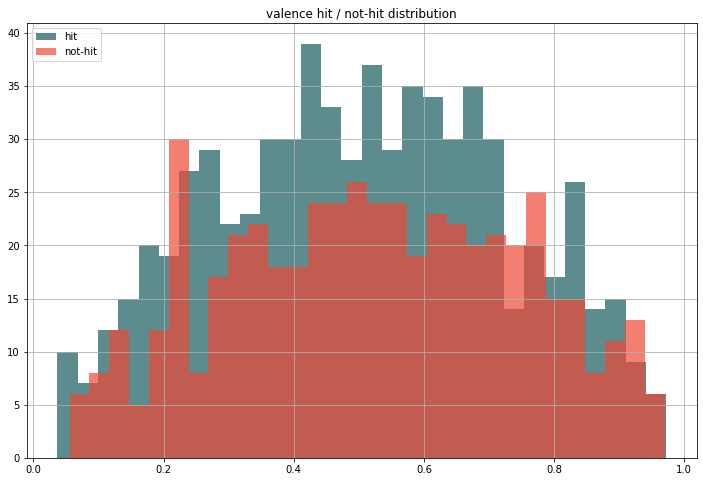

In [20]:
#valence
fig = plt.figure(figsize = (12,8))
plt.title("valence hit / not-hit distribution")
pos_valence.hist(alpha = 0.7, bins = 30, label='hit')
neg_valence.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")

In [37]:
#min samples need to split the tree is 50 | less split = more dense the tree
c = DecisionTreeClassifier(min_samples_split=100)

In [38]:
# features we want DT to consider as it is begining to be built & store it as a list
attributes = ["danceability","energy","tempo","key","acousticness","loudness","instrumentalness","valence","duration_ms"]

In [39]:
#define training & test set
X_train = train[attributes]
y_train = train["mode"]

X_test = test[attributes]
y_test = test["mode"]

In [40]:
dt = c.fit(X_train,y_train)

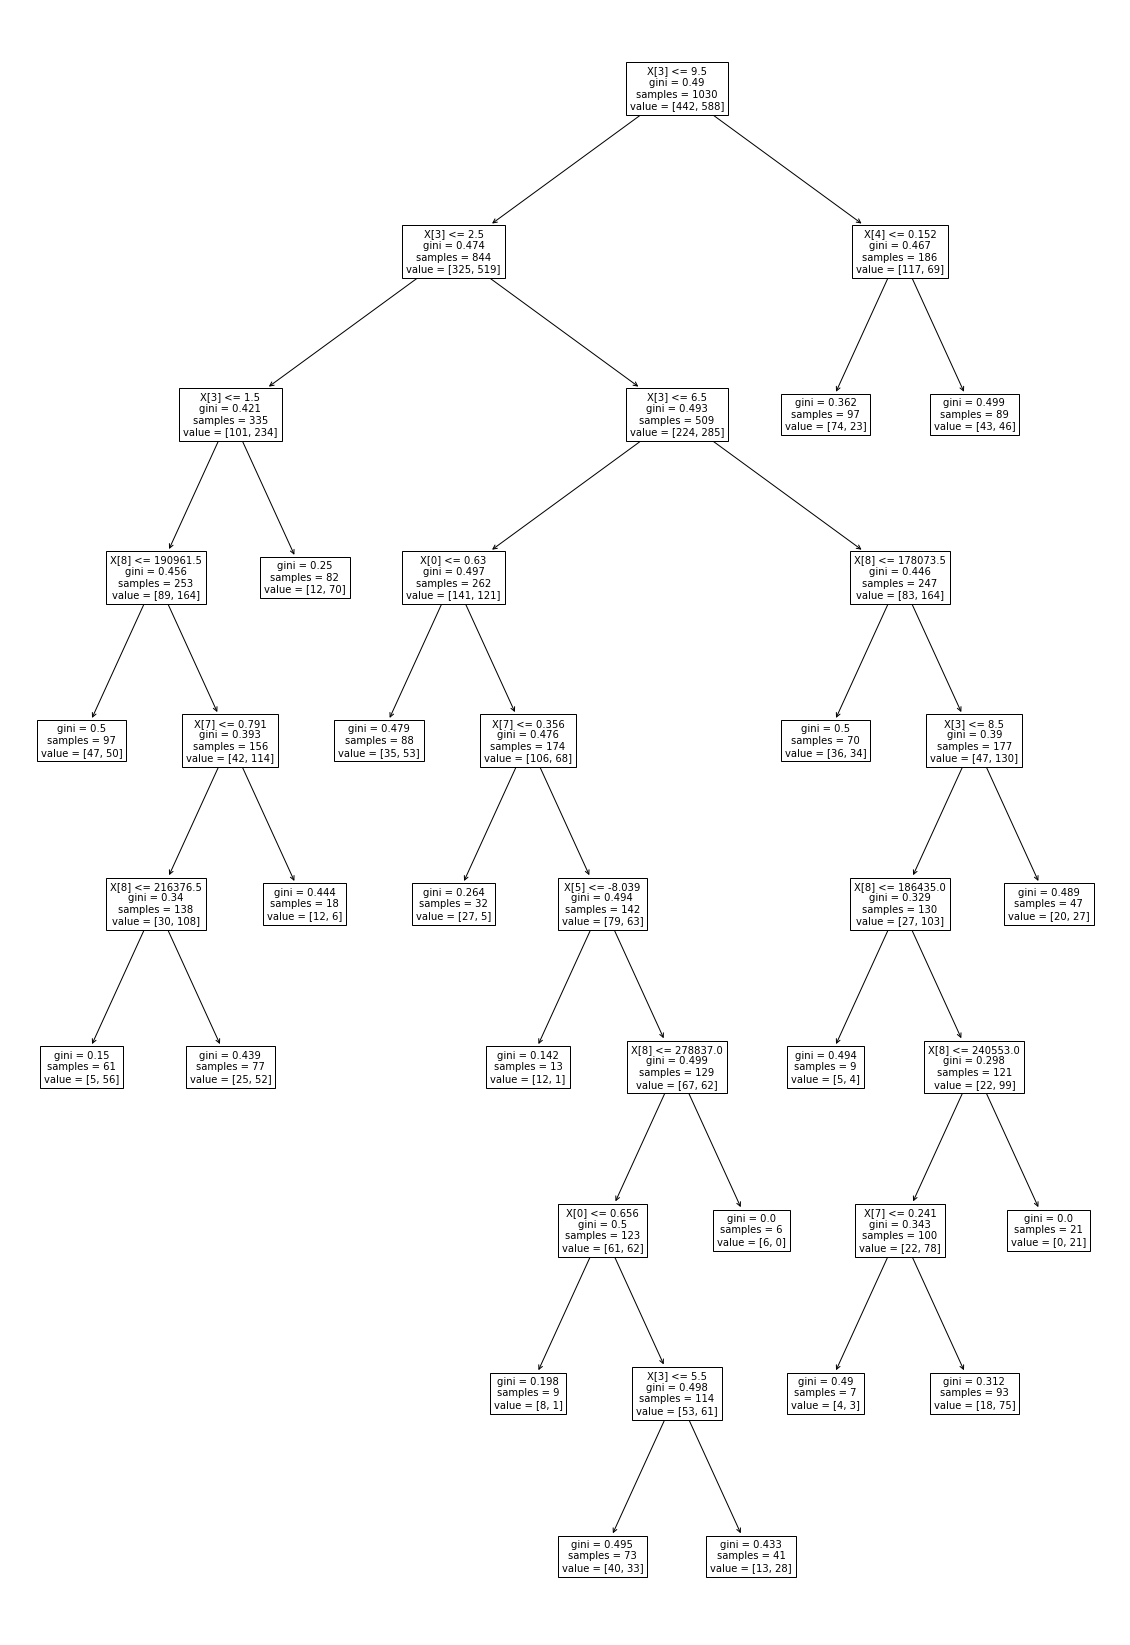

In [44]:

#decision tree image
plt.figure(figsize=(20,30))
tree.plot_tree(dt, fontsize = 10)
plt.savefig('tree_high_dpi', dpi=100)

In [26]:
y_pred = c.predict(X_test)

In [27]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1], dtype=int64)

In [28]:
#testing accuracy
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [29]:
print("Accuracy:", round(score, 1), "%")

Accuracy: 62.1 %
